In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix 
import seaborn as sns

In [2]:
def load_and_preprocess_images(folder_path, subfolders, image_size=(224, 224)):
    
    # Create a mapping from subfolder names to label indices
    label_map = {subfolder: idx for idx, subfolder in enumerate(subfolders)}
    
    # Prepare lists to hold images and labels
    images = []
    labels = []
    
    # Iterate over each subfolder
    for subfolder in subfolders:
        subfolder_path = os.path.join(folder_path, subfolder)
        for filename in os.listdir(subfolder_path):
            img_path = os.path.join(subfolder_path, filename)
            img = cv2.imread(img_path)
            if img is not None:
                # Resize the image to the target size
                img_resized = cv2.resize(img, image_size)
                images.append(img_resized)
                labels.append(label_map[subfolder])
    
    # Convert lists to NumPy arrays
    images = np.array(images)
    labels = np.array(labels)
    
    # Normalize the images
    images = images.astype('float32') / 255.0
    
    return images, labels

In [3]:
train_path = r'C:\Users\btech\Pictures\Fruits Classification\train'
test_path = r'C:\Users\btech\Pictures\Fruits Classification\test'
valid_path=r'C:\Users\btech\Pictures\Fruits Classification\valid'

subfolders = ['Apple', 'Banana', 'Grape', 'Mango','Strawberry']

x_train, y_train = load_and_preprocess_images(train_path, subfolders)
x_test , y_test = load_and_preprocess_images(test_path, subfolders)
x_valid, y_valid = load_and_preprocess_images(valid_path, subfolders)

In [4]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
print(x_valid.shape,y_valid.shape)

(9700, 224, 224, 3) (9700,)
(1500, 224, 224, 3) (1500,)
(1500, 224, 224, 3) (1500,)


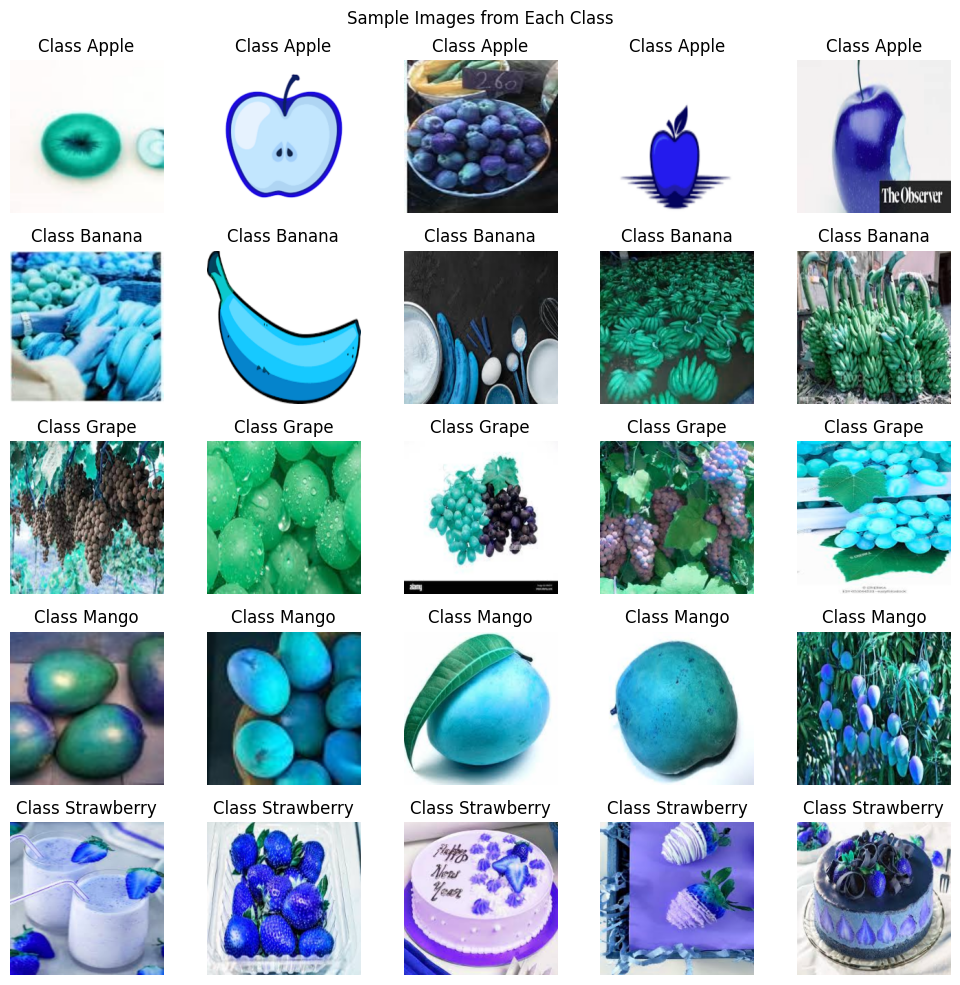

In [5]:
label_map = {subfolder: idx for idx, subfolder in enumerate(subfolders)}

plt.figure(figsize=(10, 10))
for i, subfolder in enumerate(subfolders):
    class_indices = np.where(y_train == label_map[subfolder])[0]
    for j in range(5):
        plt.subplot(len(subfolders), 5, i * 5 + j + 1)
        plt.imshow(x_train[class_indices[j]])
        plt.title(f'Class {subfolder}')
        plt.axis('off')
plt.suptitle('Sample Images from Each Class')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Number of Samples')

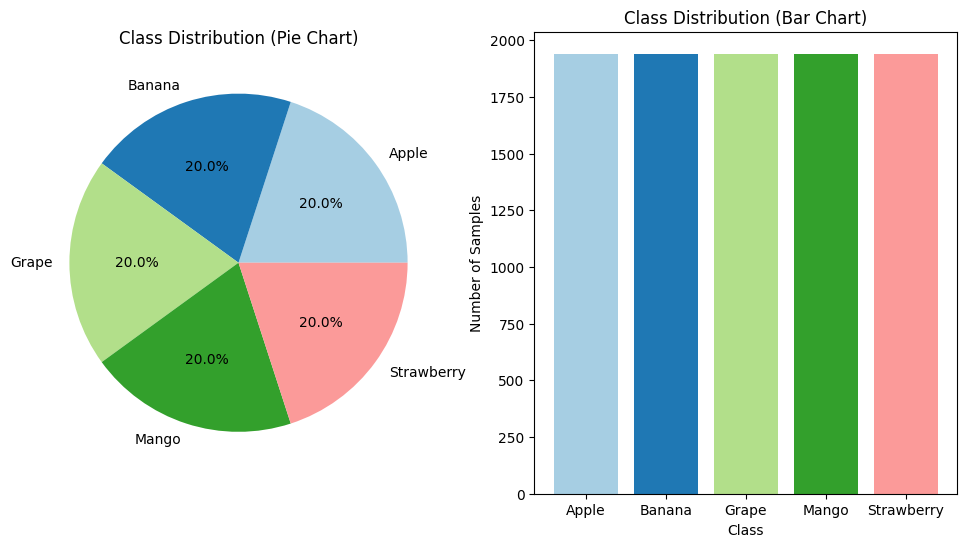

In [6]:
# Plot class distribution as a pie and bar chart
class_counts = np.bincount(y_train)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(class_counts, labels=subfolders, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Class Distribution (Pie Chart)')

plt.subplot(1, 2, 2)
plt.bar(subfolders, class_counts, color=plt.cm.Paired.colors)
plt.title('Class Distribution (Bar Chart)')
plt.xlabel('Class')
plt.ylabel('Number of Samples')

In [7]:
# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=len(subfolders))
y_test = tf.keras.utils.to_categorical(y_test, num_classes=len(subfolders))
y_valid = tf.keras.utils.to_categorical(y_valid, num_classes=len(subfolders))

In [10]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
print(x_valid.shape,y_valid.shape)

(9700, 224, 224, 3) (9700, 5)
(1500, 224, 224, 3) (1500, 5)
(1500, 224, 224, 3) (1500, 5)


In [8]:
from sklearn.utils import shuffle

# Shuffle the training and validation data
x_train, y_train = shuffle(x_train, y_train, random_state=42)
x_valid,y_valid = shuffle (x_valid,y_valid , random_state = 42)

In [9]:
print(y_train[:20])

[[1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]]


In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),  # Add Dropout after first pooling layer

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),  # Add Dropout after second pooling layer

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.1),  # Add Dropout before final dense layer

    tf.keras.layers.Dense(len(subfolders), activation='softmax')
])

C:\Users\btech\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 93312)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │     2,986,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,006,437 (11.47 MB)

 Trainable params: 3,006,437 (11.47 MB)

 Non-trainable params: 0 (0.00 B)

None


In [13]:
# Train the model and save the training history
history = model.fit(x_train, y_train, epochs=15





















, validation_data=(x_valid, y_valid),batch_size=128)

Epoch 1/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.2668 - loss: 2.9098 - val_accuracy: 0.5193 - val_loss: 1.2008
Epoch 2/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.4988 - loss: 1.2016 - val_accuracy: 0.5487 - val_loss: 1.1222
Epoch 3/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 1894s 25s/step - accuracy: 0.5197 - loss: 1.1406 - val_accuracy: 0.5780 - val_loss: 1.0376
Epoch 4/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.5344 - loss: 1.0876 - val_accuracy: 0.5753 - val_loss: 1.0418
Epoch 5/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.5714 - loss: 1.0219 - val_accuracy: 0.6107 - val_loss: 0.9873
Epoch 6/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.5952 - loss: 0.9738 - val_accuracy: 0.6347 - val_loss: 0.8875
Epoch 7/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.6383 - loss: 0.8949 - val_accuracy: 0.6940 - val_loss: 0.7914
Epoch 8/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - accuracy: 0.6792 - loss: 0.8116 - val_accuracy: 0.7387 -

In [18]:
# Assuming your trained model is named 'model'
model.save('Mennaelgamal.h5')
print("Model saved as vgg19_model.h5")

Model saved as vgg19_model.h5


In [14]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.8404 - loss: 0.5289
Test accuracy: 0.8999999761581421
Test loss: 0.35537073016166687


In [15]:
# Classification report
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, y_pred, target_names=subfolders))

47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step
              precision    recall  f1-score   support

       Apple       0.90      0.78      0.84       300
      Banana       0.92      0.89      0.91       300
       Grape       0.93      0.92      0.93       300
       Mango       0.94      0.93      0.94       300
  Strawberry       0.82      0.97      0.89       300

    accuracy                           0.90      1500
   macro avg       0.90      0.90      0.90      1500
weighted avg       0.90      0.90      0.90      1500



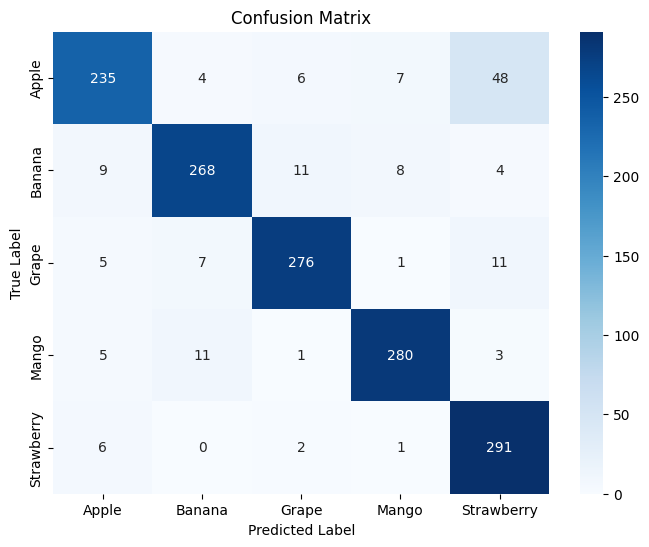

In [16]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=subfolders, yticklabels=subfolders)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

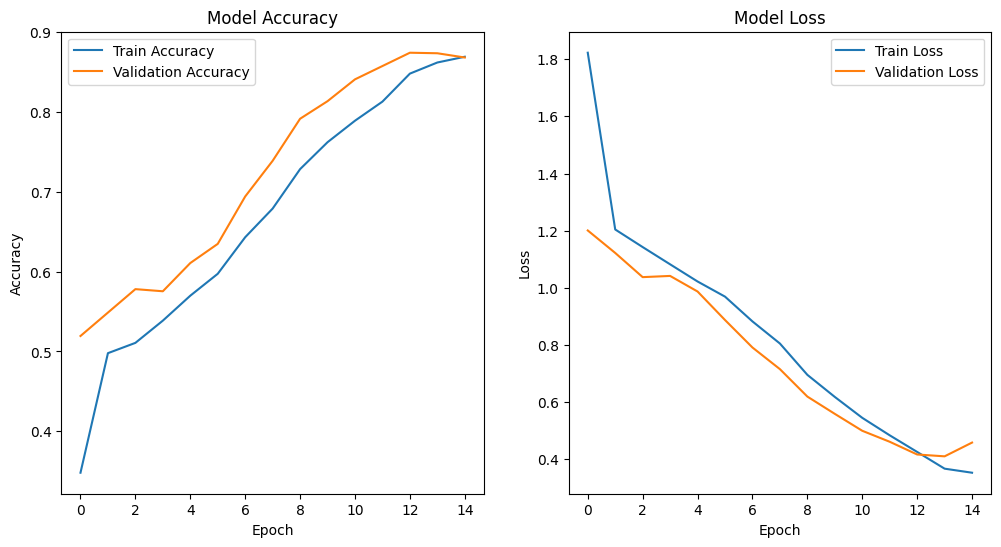

In [17]:
# Plot the history of model accuracy and loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [24]:
# Function to predict and display results for multiple images
def predict_and_display_results(model, images, true_labels, subfolders, num_images=4):
    plt.figure(figsize=(12, 12))
    
    for i in range(num_images):
        # Select a random image from the test set
        index = np.random.randint(0, len(images))
        sample_image = images[index]
        true_label = np.argmax(true_labels[index])

        # Predict the probabilities for the selected image
        predictions = model.predict(np.expand_dims(sample_image, axis=0))
        predicted_label = np.argmax(predictions[0])

        # Format and print the probabilities with their corresponding labels
        formatted_probabilities = [f'Label {subfolders[i]}: {prob:.4f}' for i, prob in enumerate(predictions[0])]

        # Print the true label, predicted label, and all probabilities
        print(f'Image {i+1}:')
        print(f'True label: {subfolders[true_label]}')
        print(f'Predicted label: {subfolders[predicted_label]}')
        print('Probabilities for each class:')
        for label_prob in formatted_probabilities:
            print(label_prob)
        print()

        # Display the image
        plt.subplot(1, num_images, i + 1)
        plt.imshow(sample_image)
        plt.title(f'True: {subfolders[true_label]}\nPredicted: {subfolders[predicted_label]}')
        plt.axis('off')
    
    plt.show()